In [1]:
import pandas as pd

In [3]:
netflix_df= pd.read_csv('netflix_titles.csv')

In [4]:
netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [5]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
netflix_df.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
netflix_df.shape

(8807, 12)

In [8]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
netflix_df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [11]:
netflix_df.index

RangeIndex(start=0, stop=8807, step=1)

In [12]:
netflix_df[['title','release_year','rating']]

,title,release_year,rating
0,Dick Johnson Is Dead,2020,PG-13
1,Blood & Water,2021,TV-MA
2,Ganglands,2021,TV-MA
3,Jailbirds New Orleans,2021,TV-MA
4,Kota Factory,2021,TV-MA
...,...,...,...
8802,Zodiac,2007,R
8803,Zombie Dumb,2018,TV-Y7
8804,Zombieland,2009,R
8805,Zoom,2006,PG


In [14]:
netflix_df['rating'].shape

(8807,)

In [17]:
netflix_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [20]:
netflix_df['rating'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: rating, Length: 8807, dtype: bool

In [21]:
netflix_df['rating'].fillna('TV-14')

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [22]:
netflix_df['rating'].nunique

<bound method IndexOpsMixin.nunique of 0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object>

In [24]:
netflix_df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

##  Top 10 most common genres on Netflix

In [28]:
netflix_df['listed_in'].str.split(',').explode().value_counts().head(10)

listed_in
 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: count, dtype: int64

## the top 10 countries producing content on Netflix?

In [31]:
netflix_df['country'].dropna().str.split(',').explode().value_counts().head(10)

country
United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
 France            181
Spain              181
Name: count, dtype: int64

In [32]:
netflix_df['country'].str.split(',').explode().value_counts().head(10)

country
United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
 France            181
Spain              181
Name: count, dtype: int64

## the distribution of content ratings?

In [33]:
netflix_df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

<Axes: title={'center': ' Content rating distribution'}, xlabel='rating'>

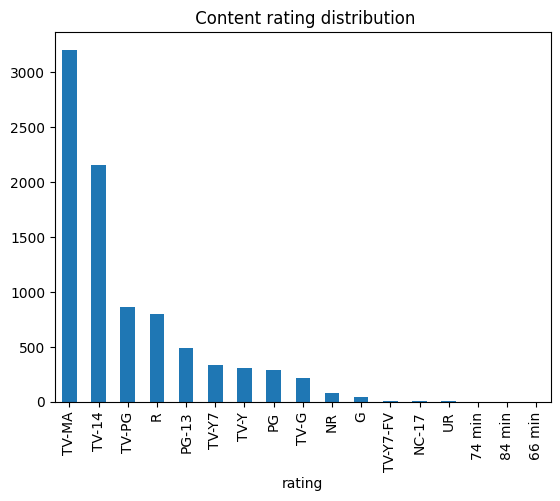

In [34]:
netflix_df['rating'].value_counts().plot(kind='bar', title=' Content rating distribution')

## Which years had the most content released?

<Axes: title={'center': 'most content release'}, xlabel='release_year'>

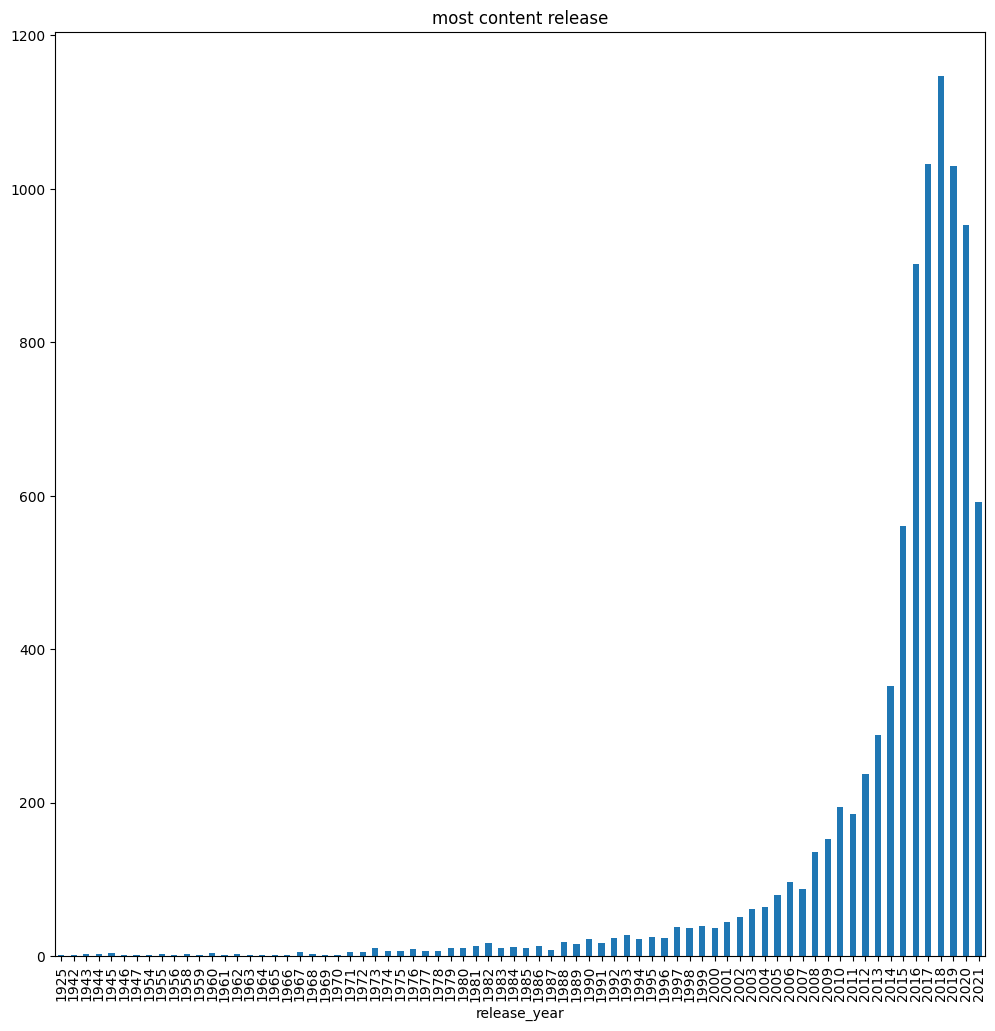

In [40]:
netflix_df['release_year'].value_counts().sort_index().plot(kind='bar', title= 'most content release', figsize= (12,12))

## How many shows/movies were added per year?

<Axes: title={'center': 'Content Added Per Year'}, xlabel='year_added'>

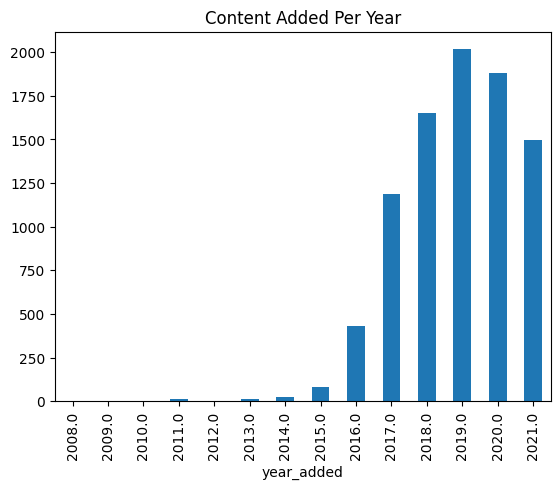

In [49]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].str.strip(), errors='coerce')
netflix_df['year_added'] = netflix_df['date_added'].dt.year

netflix_df['year_added'].value_counts().sort_index().plot(kind='bar', title='Content Added Per Year')


In [43]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [48]:
netflix_df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

## Show count of content type per year

<Axes: xlabel='release_year'>

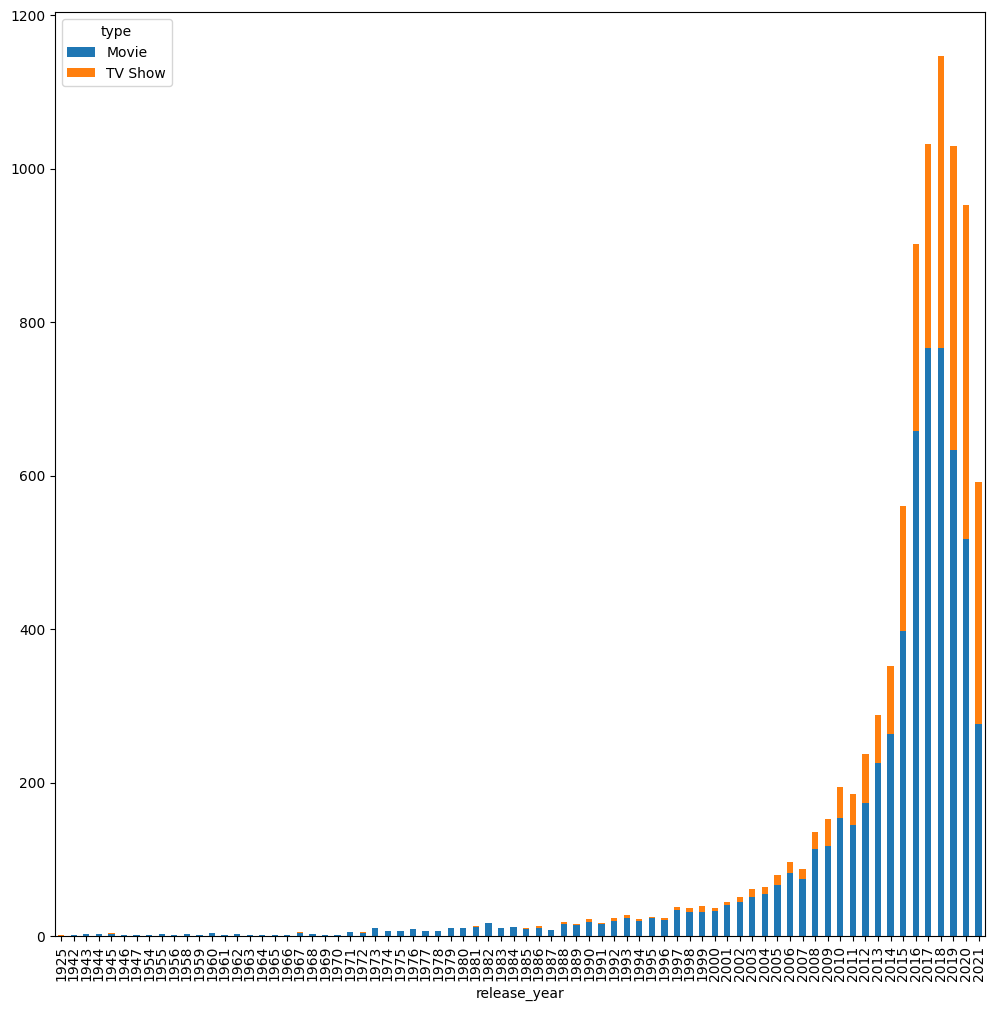

In [50]:
netflix_df.groupby(['release_year', 'type']).size().unstack().fillna(0).plot(kind='bar', stacked= True, figsize= (12,12))

## What is the average duration of movies?

In [53]:
movies= netflix_df[netflix_df['type'] == 'Movie'].copy()
movies['duration_mins']= movies['duration'].str.replace('min', '').astype(float)

In [55]:
movies['duration_mins'].mean()

np.float64(99.57718668407311)

##  Which directors have the most content on Netflix?

In [56]:
netflix_df['director'].dropna().value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

## Find all Indian Movies released after 2018

In [58]:
netflix_df[(netflix_df['country'].str.contains('India', na= False)) & (netflix_df['release_year'] >2018) & (netflix_df['type']== 'Movie')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
126,s127,Movie,Shikara,Vidhu Vinod Chopra,"Aadil Khan, Sadia Khateeb, Zain Khan Durrani, ...",India,2021-09-02,2020,TV-14,115 min,"Dramas, International Movies, Romantic Movies",A couple must strive to remain resilient after...,2021.0
190,s191,Movie,Thimmarusu,Sharan Koppisetty,"Satya Dev, Priyanka Jawalkar, Brahmaji",India,2021-08-28,2021,TV-14,125 min,"Dramas, International Movies",Eight years after a young man is framed for mu...,2021.0
518,s519,Movie,Har Kisse Ke Hisse: Kaamyaab,Hardik Mehta,"Sanjay Mishra, Deepak Dobriyal, Sarika Singh, ...",India,2021-07-06,2020,TV-14,105 min,"Dramas, International Movies","After a career of thankless credits, a retired...",2021.0
551,s552,Movie,Haseen Dillruba,Vinil Mathew,"Taapsee Pannu, Vikrant Massey, Harshvardhan Ra...",India,2021-07-02,2021,TV-MA,136 min,"International Movies, Romantic Movies, Thrillers",Under investigation as a suspect in her husban...,2021.0
735,s736,Movie,Sarbath,Prabhakaran,"Kathir, Soori, Rahasya Gorak, Ashvatt",India,2021-06-11,2021,TV-PG,113 min,"Comedies, Dramas, International Movies",When a city man returns to his native village ...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,s5962,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019.0
5966,s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019.0
6464,s6465,Movie,Chhota Bheem Kungfu Dhamaka,"Rajiv Chilaka, Binayak Das","Sonal Kaushal, Rupa Bhimani, Jigna Bharadhwaj,...",India,2019-08-15,2019,TV-Y7,112 min,Children & Family Movies,Chhota Bheem is in China for a martial arts co...,2019.0
7595,s7596,Movie,Norm of the North: Keys to the Kingdom,Tim Maltby,"Andrew Toth, Cole Howard, Maya Kay, Jennifer C...","India, United States",2020-08-21,2019,TV-PG,92 min,Children & Family Movies,When Norm the polar bear is framed for a crime...,2020.0


In [60]:
netflix_df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        10
dtype: int64